In [ ]:
%pip install pandas
%pip install sklearn
%pip install matplotlib
%pip install scipy


### Working Data

In [25]:
import pandas as pd
fromage=pd.read_table(r"./fromage.txt",sep="\t",header=0,index_col=0)
print(fromage.describe())
print('Dataset Shape:',fromage.shape)
print(fromage)

         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80.000000 

Given the dataset shape: we have 29 instances with 9 attributes,
Attributes: calories, sodium, calcium, lipides, retinol, folates, proteines, cholesterol and magnesium

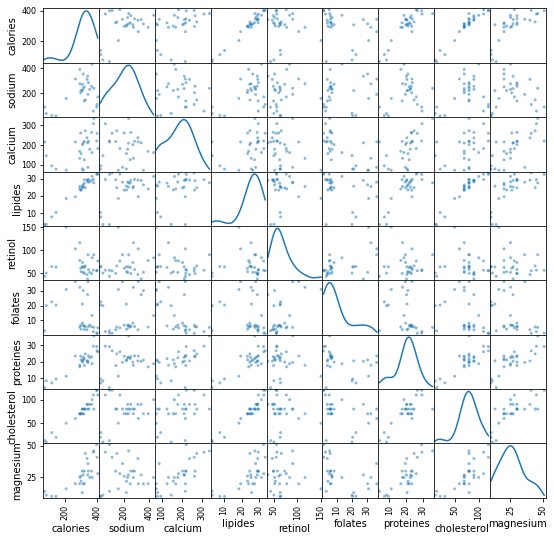

In [26]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(fromage, alpha=0.5,figsize=(9,9), diagonal='kde')
plt.show()

Attributes correlation (`scatter_matrix` analysis):
- calories & cholesterol, calories & lipides, lipides & cholesterol are positively correlated, some of them could be omitted 

### K-means

In [27]:
import numpy as np
from sklearn import cluster
np.random.seed(0)
kmeans = cluster.KMeans(n_clusters = 4)
kmeans.fit(fromage)
idk = np.argsort(kmeans.labels_)
print(kmeans.labels_)
print(pd.DataFrame(fromage.index[idk],kmeans.labels_[idk]))
print('K-means transformation:',kmeans.transform(fromage))
print("Clusters Centers:",kmeans.cluster_centers_)

[0 3 1 3 3 3 0 0 1 1 0 1 1 0 3 2 2 3 3 1 2 0 3 3 3 1 0 1 2]
             Fromages
0         CarredelEst
0                Tome
0         PontlEveque
0           Chabichou
0            Chaource
0         Coulomniers
0  Fr.chevrepatemolle
1            Beaufort
1         SaintPaulin
1             Cheddar
1               Comte
1                Edam
1            Emmental
1            Vacherin
1            Parmesan
2       Petitsuisse40
2  Yaourtlaitent.nat.
2      Fr.frais20nat.
2      Fr.frais40nat.
3           Maroilles
3             Morbier
3              Cantal
3           Camembert
3            Pyrenees
3           Reblochon
3          Rocquefort
3                Bleu
3             Babybel
3         Fr.fondu.45
K-means transformation: [[123.59715669 285.36163076 384.27301005 145.46927992]
 [110.54651897 118.43379084 303.10311983  71.72681089]
 [235.25665316  56.72603293 349.91323389 218.1879268 ]
 [159.09984736 200.30401971 393.76898843  45.60922494]
 [141.19170858 210.31138298 332.4347

#### Silhouette coefficient metric for K clusters: (`k-means model`)

Silhouette coefficient for each k [2..10] :
 [0.50681355 0.37299771 0.3282387  0.35737616 0.32267618 0.28114392
 0.29450378 0.23904343 0.25006247]


<function matplotlib.pyplot.show(close=None, block=None)>

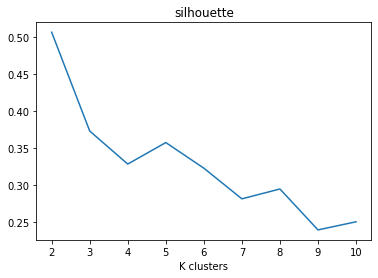

In [28]:
from sklearn import metrics
result = np.arange(9, dtype ="double")
for k in np.arange(9):
  km = cluster.KMeans(n_clusters = k+2)
  km.fit(fromage)
  result[k] = metrics.silhouette_score(fromage,km.labels_) # save 

print ('Silhouette coefficient for each k [2..10] :\n',result)

import matplotlib.pyplot as plt
plt.title("silhouette")
plt.xlabel("K clusters")
plt.plot(np.arange(2,11,1),(result))
plt.show

Based on the results:
- The closer the `Silhouette` to `1` the better the classification, then k=2 is the best number of clusters
- The objective of classification is to have the most similar instances in a cluster, thus 2 clusters (k=2) can't be enough, so k=3 or k=5 would be the better fit.

### Agglomerative Hierarchical Clustering (CHA) using `scipy`

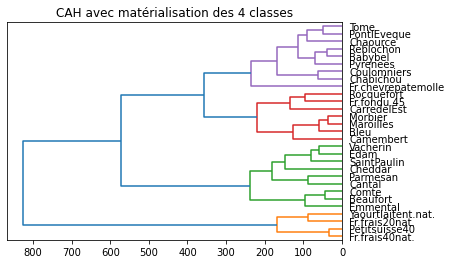

[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]
             Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat.
2         SaintPaulin
2            Beaufort
2              Cantal
2            Parmesan
2             Cheddar
2               Comte
2                Edam
2            Emmental
2            Vacherin
3          Rocquefort
3             Morbier
3           Maroilles
3         CarredelEst
3           Camembert
3                Bleu
3         Fr.fondu.45
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle


In [29]:
import pandas
import numpy as np
#CAH Libraries
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(fromage,method='ward', metric='euclidean')
#Dendrogramme
plt.title("CAH")
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=255)
plt.show()
groupes_cah = fcluster(Z, t = 255,criterion='distance')
print(groupes_cah)
#sorted groups indexes
idg = np.argsort(groupes_cah)
#display oberservations and their groups
print(pandas.DataFrame(fromage.index[idg],groupes_cah[idg]))

#### Correspondence between CAH groups and K-means groups

In [30]:
pd.crosstab(kmeans.labels_,groupes_cah)

col_0,1,2,3,4
row_0,,,,
0,0,0,1,6
1,0,8,0,0
2,4,0,0,0
3,0,1,6,3


### Classes interpretation (PCA: Principal components analysis)

The `ACP` have as an objective to transform correlated variables to new non correlated varibales (principal components), Thus reducing the amount of varibales resulting in less redundancy

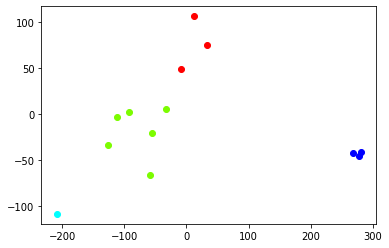

In [31]:
from sklearn.decomposition import PCA
acp = PCA(n_components =2).fit_transform(fromage)
for couleur,k in zip(['red','blue','lawngreen', 'aqua'],[0,1,2,3]):
  plt.scatter(acp[km.labels_==k,0],acp[km.labels_==k,1],c=couleur)
plt.show()

-> The blue group is isolated from the rest of the groups, making the nature of the clusters harder to interpret

### Agglomerative Hierarchical Clustering (CHA) using `sklearn.cluster.AgglomerativeClustering`

In [32]:
from sklearn.cluster import AgglomerativeClustering
np.random.seed(0)
agg_c = AgglomerativeClustering(n_clusters=4)
agg_c.fit(fromage)
idk_ = np.argsort(agg_c.labels_)
print(pd.DataFrame(fromage.index[idk_],agg_c.labels_[idk_]))

             Fromages
0         SaintPaulin
0            Beaufort
0            Parmesan
0              Cantal
0             Cheddar
0               Comte
0            Vacherin
0                Edam
0            Emmental
1         CarredelEst
1          Rocquefort
1             Morbier
1           Maroilles
1         Fr.fondu.45
1           Camembert
1                Bleu
2         Coulomniers
2            Chaource
2           Chabichou
2         PontlEveque
2            Pyrenees
2           Reblochon
2             Babybel
2                Tome
2  Fr.chevrepatemolle
3      Fr.frais20nat.
3      Fr.frais40nat.
3       Petitsuisse40
3  Yaourtlaitent.nat.


In [33]:
pd.crosstab(kmeans.labels_,groupes_cah)

col_0,0,1,2,3
row_0,,,,
0,0,1,6,0
1,8,0,0,0
2,0,0,0,4
3,1,6,3,0


In [36]:
pd.crosstab(kmeans.labels_,agg_c.labels_)

col_0,0,1,2,3
row_0,,,,
0,0,1,6,0
1,8,0,0,0
2,0,0,0,4
3,1,6,3,0


Identical results retrived using `sklearn.cluster.AgglomerativeClustering` and `scipy.cluster.hierarchy` (when compared to `k-means` results)

#### Silhouette coefficient with `sklearn.cluster.AgglomerativeClustering`

[0.52134151 1.         2.         3.         4.         5.
 6.         7.         8.        ]
[0.52134151 0.36462293 2.         3.         4.         5.
 6.         7.         8.        ]
[0.52134151 0.36462293 0.31556786 3.         4.         5.
 6.         7.         8.        ]
[0.52134151 0.36462293 0.31556786 0.29047977 4.         5.
 6.         7.         8.        ]
[0.52134151 0.36462293 0.31556786 0.29047977 0.26590169 5.
 6.         7.         8.        ]
[0.52134151 0.36462293 0.31556786 0.29047977 0.26590169 0.25366641
 6.         7.         8.        ]
[0.52134151 0.36462293 0.31556786 0.29047977 0.26590169 0.25366641
 0.26811403 7.         8.        ]
[0.52134151 0.36462293 0.31556786 0.29047977 0.26590169 0.25366641
 0.26811403 0.26090835 8.        ]
[0.52134151 0.36462293 0.31556786 0.29047977 0.26590169 0.25366641
 0.26811403 0.26090835 0.25588299]


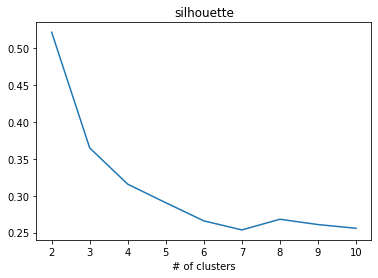

In [37]:
from sklearn import metrics
res=np.arange(9, dtype="double")
for k in np.arange(9):
  agg=AgglomerativeClustering(n_clusters= k + 2)
  agg.fit(fromage)
  res[k]=metrics.silhouette_score(fromage,agg.labels_)
  print(res)
import matplotlib.pyplot as plt
plt.title("silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),(res))
plt.show()

### Dvisive Clusting based on `K-means`

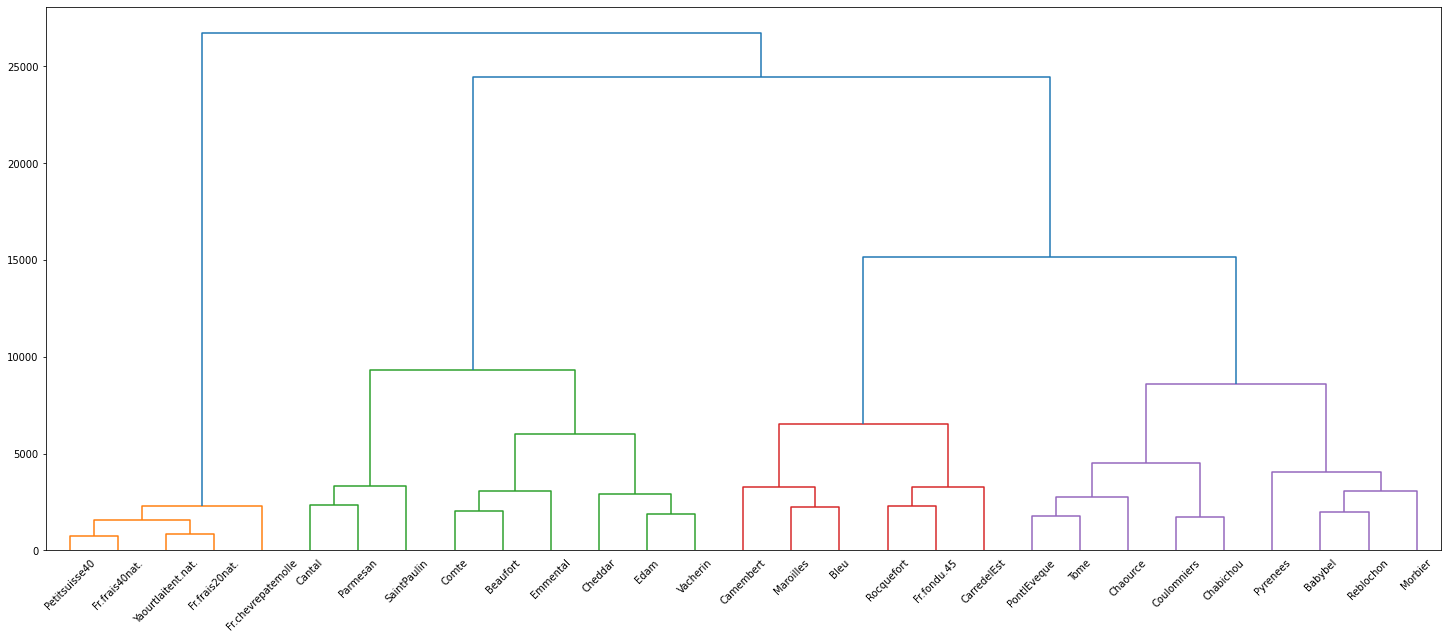

In [39]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Z contains 'linkage'
Z = []

# Starts the algorithm
def run(data):
  # Initializing the global variable Z
  global Z
  Z = []
  index = split(data,data)
  fig = plt.figure(figsize=(25, 10))
  dn = dendrogram(Z,labels=data.index, color_threshold=14000)

# Returns the index of a specific line in the dataset
def get_index(line, full_dataset):
  indexes = np.argwhere(full_dataset.index==line.index[0])
  return indexes[0][0]

# Retourns the value of a given index in the dataset
def get_value(index,full_dataset):
  n = len(full_dataset)
  if(index >= n):
    return Z[index-n][2]
  else:
    return sum(full_dataset.iloc[index])

# Retourns the distance between two elements
def get_distance(index1, index2,full_dataset):
  return get_value(index1,full_dataset) + get_value(index2,full_dataset)

# Retourns the number of elements (from the original dataset) in the cluster
def get_originals(index,full_dataset):
  n = len(full_dataset)
  if(index >= n):
    return Z[index-n][3]
  else:
    return 1

# split() est une fonction récursive (diviser pour régner) qui permet
# de diviser une dataset en deux sous-groupes en utilisant K-means
# jusqu'à qu'on arrive à des sous-groupes composés d'un seul élément
# puis on alimente Z
def split(data, full_dataset):
  n = len(full_dataset)
  if len(data) < 2:
    return get_index(data,full_dataset)
  
  # k-means init
  km = KMeans(n_clusters=2)
  km.fit(data)
  
  class1 = data[km.labels_==0]
  class2 = data[km.labels_==1]
  index1 = split(class1,full_dataset)
  index2 = split(class2,full_dataset)

  # Ajouter une ligne dans le tableau Z
  Z.append([index1, # Index du premier sous-groupe
            index2, # Index du deuxiéme sous-groupe
            get_distance(index1, index2,full_dataset), # La valeur du groupe
            get_originals(index1,full_dataset)+get_originals(index2,full_dataset)]) # Le nombre des originaux du groupe
  
  # Retourner l'index de l'élément
  return len(Z)-1+n

run(fromage)